Instructions for Tag-Along Project
Stability of the Grid System

Electrical grids require a balance between electricity supply and demand in order to be stable. Conventional systems achieve this balance through demand-driven electricity production. For future grids with a high share of inflexible (i.e., renewable) energy sources, the concept of demand response is a promising solution. This implies changes in electricity consumption in relation to electricity price changes. In this work, we’ll build a binary classification model to predict if a grid is stable or unstable using the UCI Electrical Grid Stability Simulated dataset.

Dataset: https://archive.ics.uci.edu/ml/datasets/Electrical+Grid+Stability+Simulated+Data+

It has 12 primary predictive features and two dependent variables.

Predictive features:

'tau1' to 'tau4': the reaction time of each network participant, a real value within the range 0.5 to 10 ('tau1' corresponds to the supplier node, 'tau2' to 'tau4' to the consumer nodes);
'p1' to 'p4': nominal power produced (positive) or consumed (negative) by each network participant, a real value within the range -2.0 to -0.5 for consumers ('p2' to 'p4'). As the total power consumed equals the total power generated, p1 (supplier node) = - (p2 + p3 + p4);
'g1' to 'g4': price elasticity coefficient for each network participant, a real value within the range 0.05 to 1.00 ('g1' corresponds to the supplier node, 'g2' to 'g4' to the consumer nodes; 'g' stands for 'gamma');
Dependent variables:

'stab': the maximum real part of the characteristic differential equation root (if positive, the system is linearly unstable; if negative, linearly stable);
'stabf': a categorical (binary) label ('stable' or 'unstable').
Because of the direct relationship between 'stab' and 'stabf' ('stabf' = 'stable' if 'stab' <= 0, 'unstable' otherwise), 'stab' should be dropped and 'stabf' will remain as the sole dependent variable (binary classification).

Split the data into an 80-20 train-test split with a random state of “1”. Use the standard scaler to transform the train set (x_train, y_train) and the test set (x_test). Use scikit learn to train a random forest and extra trees classifier. And use xgboost and lightgbm to train an extreme boosting model and a light gradient boosting model. Use random_state = 1 for training all models and evaluate on the test set. Answer the following questions:

In [34]:
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv("Data_for_UCI_named.csv")

In [3]:
df.head()

,tau1,tau2,tau3,tau4,p1,p2,p3,p4,g1,g2,g3,g4,stab,stabf
0,2.959060,3.079885,8.381025,9.780754,3.763085,-0.782604,-1.257395,-1.723086,0.650456,0.859578,0.887445,0.958034,0.055347,unstable
1,9.304097,4.902524,3.047541,1.369357,5.067812,-1.940058,-1.872742,-1.255012,0.413441,0.862414,0.562139,0.781760,-0.005957,stable
2,8.971707,8.848428,3.046479,1.214518,3.405158,-1.207456,-1.277210,-0.920492,0.163041,0.766689,0.839444,0.109853,0.003471,unstable
3,0.716415,7.669600,4.486641,2.340563,3.963791,-1.027473,-1.938944,-0.997374,0.446209,0.976744,0.929381,0.362718,0.028871,unstable
4,3.134112,7.608772,4.943759,9.857573,3.525811,-1.125531,-1.845975,-0.554305,0.797110,0.455450,0.656947,0.820923,0.049860,unstable


In [4]:
df.shape

(10000, 14)

In [5]:
df.isna().sum()

tau1     0
tau2     0
tau3     0
tau4     0
p1       0
p2       0
p3       0
p4       0
g1       0
g2       0
g3       0
g4       0
stab     0
stabf    0
dtype: int64

In [6]:
df.stabf.value_counts()

unstable    6380
stable      3620
Name: stabf, dtype: int64

In [7]:
df = df.drop("stab", axis =1)

In [8]:
df_s = df[df.stabf== 'stable' ]
df_us = df[df.stabf== 'unstable' ].sample( 4500,random_state = 1 )

In [9]:
df1 = pd.concat([df_s,df_us], axis = 0)
df1.shape

(8120, 13)

In [10]:
import sklearn.utils
df1 = sklearn.utils.shuffle(df1)
df1 = df1.reset_index(drop= True )
df1.head()

,tau1,tau2,tau3,tau4,p1,p2,p3,p4,g1,g2,g3,g4,stabf
0,0.810919,8.133520,0.549575,4.083202,2.448035,-1.089582,-0.827983,-0.530470,0.195460,0.862780,0.808818,0.762745,stable
1,9.437332,8.756440,2.306779,1.471366,2.889743,-0.837644,-1.464485,-0.587614,0.267648,0.601513,0.553181,0.329807,stable
2,3.648517,2.436924,2.838589,2.955571,3.964654,-0.813638,-1.833647,-1.317368,0.254153,0.907476,0.373152,0.050028,stable
3,1.731327,9.108828,5.159900,4.474762,3.504325,-1.730063,-0.834046,-0.940217,0.177749,0.520175,0.791095,0.629821,unstable
4,3.600860,0.841993,8.232926,9.723044,4.194645,-1.966628,-0.965838,-1.262179,0.366541,0.546375,0.975715,0.337411,unstable


In [11]:
df1.stabf.value_counts()

unstable    4500
stable      3620
Name: stabf, dtype: int64

In [12]:
X = df1.drop('stabf', axis = 1)
y = df1.stabf

In [13]:
#split the data into training and testing sets
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size= 0.2 , random_state= 0 )
y_train.value_counts()

unstable    3591
stable      2905
Name: stabf, dtype: int64

In [16]:
from imblearn.over_sampling import SMOTE
smote = SMOTE(random_state= 1)
x_train_balanced, y_balanced = smote.fit_resample(x_train, y_train)
y_balanced.value_counts()

stable      3591
unstable    3591
Name: stabf, dtype: int64

In [17]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x_train_scale = scaler.fit_transform(x_train_balanced)
x_test_scale = scaler.transform(x_test)

In [18]:
#Logistic Regression
from sklearn.linear_model import LogisticRegression
log_reg = LogisticRegression()
log_reg=log_reg.fit(x_train_scale, y_balanced)

In [19]:
log_reg.score(x_test_scale,y_test)

0.8017241379310345

# CROSS VALIDATION SCORE

In [20]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(log_reg, x_train_scale, y_balanced, cv= 5 , scoring= 'f1_macro' )
print(scores)
print(scores.mean())

[0.79260655 0.78914037 0.79456018 0.80779012 0.81615456]
0.8000503562892153


# K FOLDS

In [21]:
x_df = pd.DataFrame(x_train_scale, columns = X.columns)
from sklearn.model_selection import KFold
from sklearn.metrics import f1_score
kf = KFold(n_splits= 5 )
kf.split(x_df)
f1 = []
for train_index,test_index in kf.split(x_df):
    X_train,X_test= x_df.iloc[train_index],x_df.iloc[test_index]
    Y_train,Y_test = y_balanced.iloc[train_index], y_balanced[test_index]
    model = LogisticRegression().fit(X_train, Y_train)
     #save result to list
    f1.append(f1_score(y_true=Y_test, y_pred=model.predict(X_test), pos_label= 'stable' )* 100 )
print(f1)
print(np.mean(f1))

[76.7787333854574, 78.69822485207101, 76.4484574868322, 79.84790874524715, 84.23772609819122]
79.2022101135598


# STRATIFIED K FOLDS

In [22]:
from sklearn.model_selection import StratifiedKFold
skf = StratifiedKFold(n_splits= 5 , shuffle= True , random_state= 1 )
f1_scores = []
for train_index,test_index in skf.split(x_df, y_balanced):
    X_train,X_test= x_df.iloc[train_index],x_df.iloc[test_index]
    Y_train,Y_test = y_balanced.iloc[train_index], y_balanced[test_index]
    model = LogisticRegression().fit(X_train, Y_train)
     #save result to list
    f1_scores.append(f1_score(y_true=Y_test, y_pred=model.predict(X_test), pos_label= 'stable' )* 100 )
print(f1_scores)
print(np.mean(f1_scores))

[79.83310152990263, 79.58333333333333, 80.33472803347281, 80.33012379642366, 79.3127147766323]
79.87880029395293


# Leave One Out Cross Validation (LOOCV)

In [23]:
from sklearn.model_selection import LeaveOneOut
loo = LeaveOneOut()
#scores = cross_val_score(LogisticRegression(), x_df, y_balanced, cv=loo,scoring= 'f1_macro' )
#print(scores)
#average_score = scores.mean() * 100

# CONFUSION MATRIX

In [24]:
from sklearn.metrics import recall_score, accuracy_score, precision_score, f1_score, confusion_matrix
new_predictions = log_reg.predict(x_test_scale)
cnf_mat = confusion_matrix(y_true=y_test, y_pred=new_predictions, labels=[ 'stable' , 'unstable' ])
cnf_mat

array([[579, 136],
       [186, 723]], dtype=int64)

In [25]:
#Accuracy
accuracy = accuracy_score(y_true=y_test, y_pred=new_predictions)
print( 'Accuracy: {}' .format(round(accuracy* 100 ), 2 ))
#Precision
precision = precision_score(y_true=y_test, y_pred=new_predictions, pos_label= 'stable' )
print( 'Precision: {}' .format(round(precision* 100 ), 2 ))
#Recall
recall = recall_score(y_true=y_test, y_pred=new_predictions, pos_label= 'stable' )
print( 'Recall: {}' .format(round(recall* 100 ), 2 )) #prints 51.0
#F1-Score
f1 = f1_score(y_true=y_test, y_pred=new_predictions, pos_label= 'stable' )
print( 'F1: {}' .format(round(f1* 100 ), 2 )) #prints 45.0 

Accuracy: 80
Precision: 76
Recall: 81
F1: 78


In [27]:
from sklearn.metrics import classification_report, plot_confusion_matrix

C:\Users\user\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


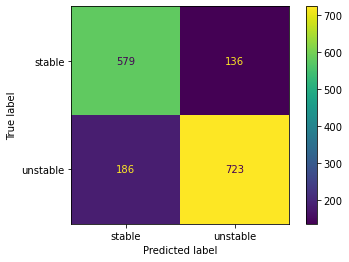

In [33]:
plot_confusion_matrix(log_reg, x_test_scale,y_test)

In [36]:
print(classification_report(y_test,new_predictions))

              precision    recall  f1-score   support

      stable       0.76      0.81      0.78       715
    unstable       0.84      0.80      0.82       909

    accuracy                           0.80      1624
   macro avg       0.80      0.80      0.80      1624
weighted avg       0.80      0.80      0.80      1624



# DECISION TREE

In [26]:
from sklearn.tree import DecisionTreeClassifier
dec_tree = DecisionTreeClassifier()
dec_tree.fit(x_train_scale, y_balanced) 
dec_tree.score(x_test_scale,y_test)

0.8300492610837439

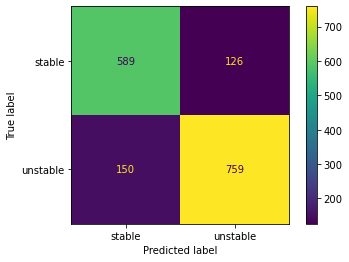

In [35]:
plot_confusion_matrix(dec_tree, x_test_scale,y_test)

In [37]:
print(classification_report(y_test,dec_tree.predict(x_test_scale)))

              precision    recall  f1-score   support

      stable       0.80      0.82      0.81       715
    unstable       0.86      0.83      0.85       909

    accuracy                           0.83      1624
   macro avg       0.83      0.83      0.83      1624
weighted avg       0.83      0.83      0.83      1624



In [38]:
from sklearn.ensemble import RandomForestClassifier

In [40]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier()
rfc = rfc.fit(x_train_scale,y_balanced)
rfc.score(x_test_scale,y_test)

0.9205665024630542

In [43]:
scores = cross_val_score(rfc, x_train_scale, y_balanced, cv= 5 , scoring= 'f1_macro' )
print(scores)
print(scores.mean())

[0.90464402 0.91718714 0.90876902 0.92056828 0.94766436]
0.9197665652144608


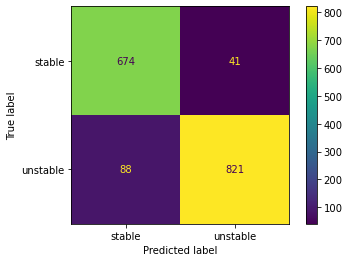

In [41]:
plot_confusion_matrix(rfc, x_test_scale,y_test)

In [42]:
print(classification_report(y_test,rfc.predict(x_test_scale)))

              precision    recall  f1-score   support

      stable       0.88      0.94      0.91       715
    unstable       0.95      0.90      0.93       909

    accuracy                           0.92      1624
   macro avg       0.92      0.92      0.92      1624
weighted avg       0.92      0.92      0.92      1624



In [44]:
from sklearn.ensemble import VotingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split

In [45]:
# group / ensemble of models
estimator = []
estimator.append(('LR', 
                  LogisticRegression(solver ='lbfgs', 
                                     max_iter = 200)))
estimator.append(('SVC', SVC(gamma ='auto', probability = True)))
estimator.append(('DTC', DecisionTreeClassifier()))
estimator.append(('RFC', RandomForestClassifier()))


In [58]:
# Voting Classifier with hard voting
vot_hard = VotingClassifier(estimators = estimator, voting ='hard')
vot_hard.fit(x_train_scale, y_balanced)
y_pred = vot_hard.predict(x_test_scale)
  
# using accuracy_score metric to predict accuracy
score = vot_hard.score(x_test_scale,y_test)
print("Hard Voting Score = ", np.round(score, 2) *100 ,'%')
  
# Voting Classifier with soft voting
vot_soft = VotingClassifier(estimators = estimator, voting ='soft')
vot_soft.fit(x_train_scale, y_balanced)
y_pred = vot_soft.predict(x_test_scale)
  
# using accuracy_score
score = accuracy_score(y_test, y_pred)
print("Soft Voting Score = ", np.round(score, 2) *100 ,'%')

Hard Voting Score =  91.0 %
Soft Voting Score =  93.0 %


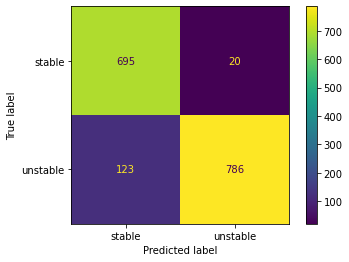

In [59]:
plot_confusion_matrix(vot_hard, x_test_scale,y_test)

In [61]:
print(classification_report(y_test,vot_hard.predict(x_test_scale)))

              precision    recall  f1-score   support

      stable       0.85      0.97      0.91       715
    unstable       0.98      0.86      0.92       909

    accuracy                           0.91      1624
   macro avg       0.91      0.92      0.91      1624
weighted avg       0.92      0.91      0.91      1624



# BAGGING

In [64]:
from sklearn.ensemble import BaggingClassifier
from sklearn import model_selection

In [66]:
seed = 8
kfold = model_selection.KFold(n_splits = 3, shuffle=True,
                       random_state = seed)
  
# initialize the base classifier
base_cls = DecisionTreeClassifier()
  
# no. of base classifier
num_trees = 500
  
# bagging classifier
model = BaggingClassifier(base_estimator = base_cls,
                          n_estimators = num_trees,
                          random_state = seed)
  
results = model_selection.cross_val_score(model, X, y, cv = kfold)
print(results)
print("accuracy :")
print(results.mean())

[0.91614333 0.89730329 0.90243902]
accuracy :
0.9052952147548812


# XGBoost (eXtreme Gradient Boosting)

In [69]:
#pip install xgboost

In [74]:
import xgboost as xgb
from sklearn.preprocessing import LabelEncoder

In [77]:
# Fitting XGBoost to the training data
# encode string class values as integers
label_encoder = LabelEncoder()
label_encoder = label_encoder.fit(y_balanced)
label_encoded_y = label_encoder.transform(y_balanced)
my_model = xgb.XGBClassifier()
my_model.fit(x_train_scale, label_encoded_y)
 
# Predicting the Test set results
y_pred = my_model.predict(x_test_scale)
 
# Making the Confusion Matrix
y_test_enco   = label_encoder.transform(y_test)
cm = confusion_matrix(y_test_enco, y_pred)

In [79]:
cm

array([[686,  29],
       [ 58, 851]], dtype=int64)

In [78]:
print(classification_report(y_test_enco,my_model.predict(x_test_scale)))

              precision    recall  f1-score   support

           0       0.92      0.96      0.94       715
           1       0.97      0.94      0.95       909

    accuracy                           0.95      1624
   macro avg       0.94      0.95      0.95      1624
weighted avg       0.95      0.95      0.95      1624



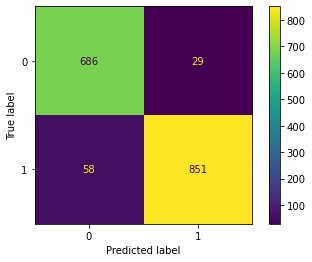

In [80]:
plot_confusion_matrix(my_model, x_test_scale,y_test_enco)

XGBoost is a very fast and accurate ML algorithm. But now it's been challenged by LightGBM — which runs even faster with comparable model accuracy and more hyperparameters for users to tune.

#  LightGBM 

In [82]:
#pip install lightgbm

     ---------------------------------------- 1.0/1.0 MB 797.0 kB/s eta 0:00:00



In [83]:
# build the lightgbm model
import lightgbm as lgb
clf = lgb.LGBMClassifier()
clf.fit(x_train_scale, y_balanced)
print(classification_report(y_test,clf.predict(x_test_scale)))

LGBMClassifier()

In [84]:
print(classification_report(y_test,clf.predict(x_test_scale)))

              precision    recall  f1-score   support

      stable       0.92      0.95      0.93       715
    unstable       0.96      0.94      0.95       909

    accuracy                           0.94      1624
   macro avg       0.94      0.94      0.94      1624
weighted avg       0.94      0.94      0.94      1624



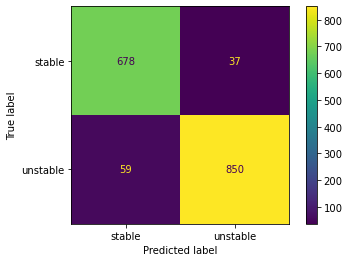

In [85]:
plot_confusion_matrix(clf, x_test_scale,y_test)